# NCI Gene Plotting

## Load Packages

In [3]:
import pandas as pd
import plotly.express as px
import numpy as np
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt


pd.set_option('future.no_silent_downcasting', True)

## Load Data

In [5]:
response = requests.get('https://raw.githubusercontent.com/aaditya0106/cancer-dashboard/data-processing/geneClinicalCleanStageGeneUpdate.csv')
if response.status_code == 200:
    df = pd.read_csv(StringIO(response.text), sep=',')
    print("Data loaded successfully!")
else:
    print(f"Failed to fetch data: {response.status_code}")

Data loaded successfully!


In [6]:
df.head()

,Unnamed: 0,Case,project_id,age_at_index,days_to_birth,ethnicity,gender,race,vital_status,year_of_birth,...,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type,Gene,Expression,Cancer Stage
0,0,TCGA-AC-A2QJ,TCGA-BRCA,48.0,-17569.0,hispanic or latino,female,white,Dead,1963.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2011.0,yes,"Pharmaceutical Therapy, NOS",TP53INP1,-0.741622,Stage III
1,1,TCGA-FA-A7DS,TCGA-DLBC,54.0,-20087.0,not hispanic or latino,female,asian,Alive,1959.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2013.0,no,"Radiation Therapy, NOS",TP53INP1,-1.031957,NaN
2,2,TCGA-FA-A7DS,TCGA-DLBC,54.0,-20087.0,not hispanic or latino,female,asian,Alive,1959.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2013.0,yes,"Pharmaceutical Therapy, NOS",TP53INP1,-1.031957,NaN
3,3,TCGA-A2-A4S1,TCGA-BRCA,66.0,-24353.0,not hispanic or latino,female,white,Alive,1946.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2012.0,yes,"Radiation Therapy, NOS",TP53INP1,-0.884677,Stage II
4,4,TCGA-A2-A4S1,TCGA-BRCA,66.0,-24353.0,not hispanic or latino,female,white,Alive,1946.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2012.0,no,"Pharmaceutical Therapy, NOS",TP53INP1,-0.884677,Stage II


In [7]:
df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df.head()

,Case,project_id,age_at_index,days_to_birth,ethnicity,gender,race,vital_status,year_of_birth,age_at_diagnosis,...,site_of_resection_or_biopsy,synchronous_malignancy,tissue_or_organ_of_origin,tumor_grade,year_of_diagnosis,treatment_or_therapy,treatment_type,Gene,Expression,Cancer Stage
0,TCGA-AC-A2QJ,TCGA-BRCA,48.0,-17569.0,hispanic or latino,female,white,Dead,1963.0,17569.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2011.0,yes,"Pharmaceutical Therapy, NOS",TP53INP1,-0.741622,Stage III
1,TCGA-FA-A7DS,TCGA-DLBC,54.0,-20087.0,not hispanic or latino,female,asian,Alive,1959.0,20087.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2013.0,no,"Radiation Therapy, NOS",TP53INP1,-1.031957,NaN
2,TCGA-FA-A7DS,TCGA-DLBC,54.0,-20087.0,not hispanic or latino,female,asian,Alive,1959.0,20087.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2013.0,yes,"Pharmaceutical Therapy, NOS",TP53INP1,-1.031957,NaN
3,TCGA-A2-A4S1,TCGA-BRCA,66.0,-24353.0,not hispanic or latino,female,white,Alive,1946.0,24353.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2012.0,yes,"Radiation Therapy, NOS",TP53INP1,-0.884677,Stage II
4,TCGA-A2-A4S1,TCGA-BRCA,66.0,-24353.0,not hispanic or latino,female,white,Alive,1946.0,24353.0,...,"Breast, NOS",No,"Breast, NOS",Not Reported,2012.0,no,"Pharmaceutical Therapy, NOS",TP53INP1,-0.884677,Stage II


In [9]:
df.duplicated().sum()

0

In [10]:
df[['Case', 'Gene']].duplicated().sum()

1215

In [11]:
df_drop = df.drop(columns = ['treatment_or_therapy', 'treatment_type'])

In [12]:
df_drop.duplicated().sum()

1215

In [13]:
df_drop_Clean = df_drop.drop_duplicates()

In [14]:
df_drop_Clean[['Case', 'Gene']].duplicated().sum()

0

In [15]:
df.shape

(2673, 35)

In [16]:
df_drop_Clean.shape

(1458, 33)

### Trying to get the hover data to work on the heatmap

In [48]:
df_drop_Clean['Cancer Stage'] = df_drop_Clean['Cancer Stage'].astype(str)


C:\Users\sarah\AppData\Local\Temp\ipykernel_30188\2396436940.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
print(df_drop_Clean['Cancer Stage'].isnull().sum())  # Check for null values


0


In [52]:
df_drop_Clean['Cancer Stage'].fillna('Unknown', inplace=True)  # Replace NaNs with 'Unknown'


C:\Users\sarah\AppData\Local\Temp\ipykernel_30188\3855727340.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\sarah\AppData\Local\Temp\ipykernel_30188\3855727340.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [56]:
# Check for missing values in the dataframe
print(df_drop_Clean.isnull().sum())

# Check for any infinite or non-numeric values
print((df_drop_Clean == float('inf')).sum())
print((df_drop_Clean == float('-inf')).sum())

# Ensure all columns have valid types (if you use `hover_data` for all columns)
print(df_drop_Clean.dtypes)


Case                             0
project_id                       0
age_at_index                   216
days_to_birth                  189
ethnicity                        0
gender                           0
race                             0
vital_status                     0
year_of_birth                  189
age_at_diagnosis                27
ajcc_pathologic_m              243
ajcc_pathologic_n              243
ajcc_pathologic_stage          216
ajcc_pathologic_t              243
ajcc_staging_system_edition    297
classification_of_tumor        189
days_to_diagnosis              216
days_to_last_follow_up         324
icd_10_code                    216
last_known_disease_status      216
morphology                       0
primary_diagnosis                0
prior_malignancy               189
prior_treatment                216
progression_or_recurrence      216
site_of_resection_or_biopsy      0
synchronous_malignancy         216
tissue_or_organ_of_origin        0
tumor_grade         

In [58]:
df_drop_Clean = df_drop_Clean.astype(str)


### Plotting hover_data allegedly for stage value but it does not show up

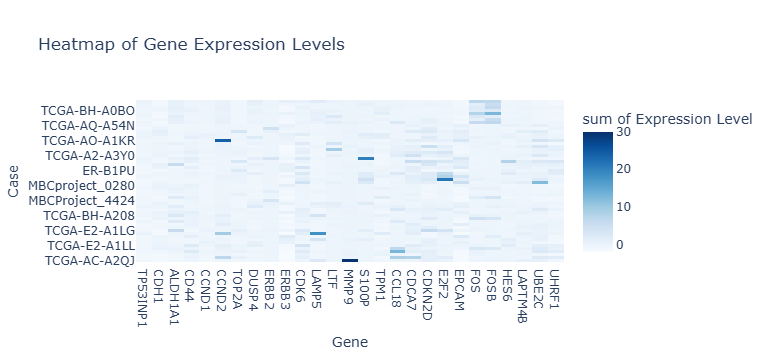

In [60]:
# heatmap = px.density_heatmap(
#     df_drop_Clean,
#     x="Gene",
#     y="Case",
#     z="Expression",
#     color_continuous_scale="Blues",
#     range_color=(-2, 30),
#     title="Heatmap of Gene Expression Levels",
#     labels={'Expression': 'Expression Level'},
#     hover_data=['Cancer Stage']
# )

# heatmap.show()

heatmap = px.density_heatmap(
    df_drop_Clean,
    x="Gene",
    y="Case",
    z="Expression",
    color_continuous_scale="Blues",
    range_color=(-2, 30),
    title="Heatmap of Gene Expression Levels",
    labels={'Expression': 'Expression Level'},
    hover_data= ['Cancer Stage']
)

heatmap.show()

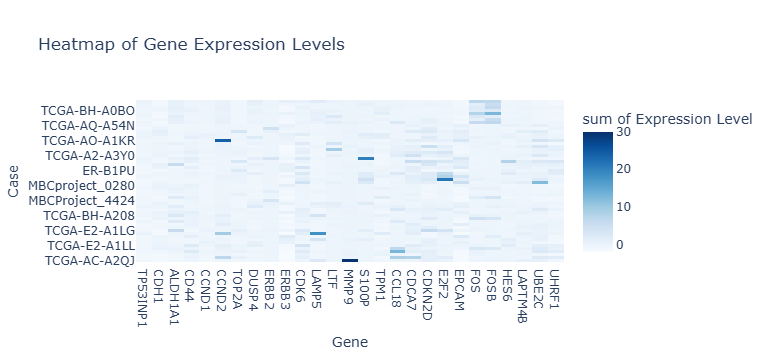

In [62]:
heatmap = px.density_heatmap(
    df_drop_Clean[['Gene', 'Case', 'Expression', 'Cancer Stage']],  # Reduce to key columns
    x="Gene",
    y="Case",
    z="Expression",
    color_continuous_scale="Blues",
    range_color=(-2, 30),
    title="Heatmap of Gene Expression Levels",
    labels={'Expression': 'Expression Level'},
    hover_data=['Cancer Stage']  # Ensure this column appears in hover tooltip
)

heatmap.show()


In [38]:
df_drop_Clean.columns

Index(['Case', 'project_id', 'age_at_index', 'days_to_birth', 'ethnicity',
       'gender', 'race', 'vital_status', 'year_of_birth', 'age_at_diagnosis',
       'ajcc_pathologic_m', 'ajcc_pathologic_n', 'ajcc_pathologic_stage',
       'ajcc_pathologic_t', 'ajcc_staging_system_edition',
       'classification_of_tumor', 'days_to_diagnosis',
       'days_to_last_follow_up', 'icd_10_code', 'last_known_disease_status',
       'morphology', 'primary_diagnosis', 'prior_malignancy',
       'prior_treatment', 'progression_or_recurrence',
       'site_of_resection_or_biopsy', 'synchronous_malignancy',
       'tissue_or_organ_of_origin', 'tumor_grade', 'year_of_diagnosis', 'Gene',
       'Expression', 'Cancer Stage'],
      dtype='object')

In [44]:
print(df_drop_Clean['Cancer Stage'].dtype)


object


In [86]:
# Convert 'Expression' to numeric, replacing errors with NaN
df_drop_Clean['Expression'] = pd.to_numeric(df_drop_Clean['Expression'], errors='coerce')

# Replace NaN values with 0
df_drop_Clean['Expression'].fillna(0, inplace=True)


C:\Users\sarah\AppData\Local\Temp\ipykernel_30188\660663618.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





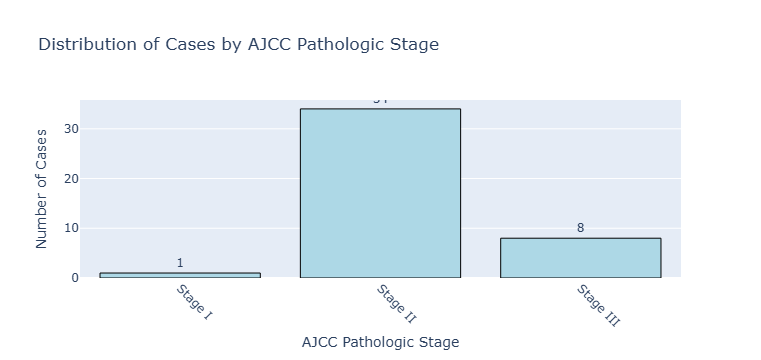

In [92]:
# Group data and calculate mean expression
aggregated_data = df_drop_Clean.groupby(
    ['Case', 'Cancer Stage', 'ajcc_pathologic_n', 'ajcc_pathologic_m', 'ajcc_pathologic_t', 'ajcc_pathologic_stage'], as_index=False
).agg({'Expression': 'mean'})

# Filter out "Unknown" values for the 'ajcc_pathologic_stage' column in the aggregated_data
filtered_data = aggregated_data[aggregated_data['ajcc_pathologic_stage'] != "Unknown"]

# Ensure 'Cancer Stage' is ordered correctly
sorted_stages = ['Stage I', 'Stage II', 'Stage III']
filtered_data['Cancer Stage'] = pd.Categorical(filtered_data['Cancer Stage'], categories=sorted_stages, ordered=True)

# Count cases by stage
stage_counts = filtered_data['Cancer Stage'].value_counts().sort_index()

# Create a DataFrame for Plotly
plot_data = stage_counts.reset_index()
plot_data.columns = ['Cancer Stage', 'Number of Cases']

# Create a bar plot using Plotly
fig = px.bar(
    plot_data,
    x='Cancer Stage',
    y='Number of Cases',
    text='Number of Cases',
    title='Distribution of Cases by AJCC Pathologic Stage',
    labels={'Cancer Stage': 'AJCC Pathologic Stage', 'Number of Cases': 'Number of Cases'},
)

# Customize plot appearance
fig.update_traces(textposition='outside', marker_color='lightblue', marker_line_color='black', marker_line_width=1)
fig.update_layout(xaxis_title='AJCC Pathologic Stage', yaxis_title='Number of Cases', xaxis_tickangle=45)

# Display the plot
fig.show()


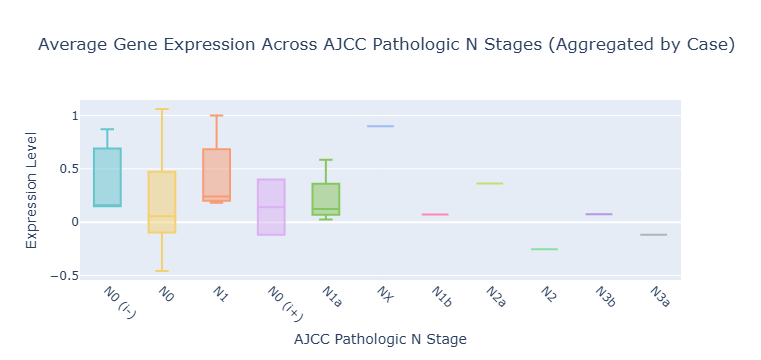

In [100]:
# Filter out "Unknown" and NaN values for AJCC Pathologic N stages
filtered_data_state_n = aggregated_data[
    (aggregated_data['ajcc_pathologic_n'] != "Unknown") & (aggregated_data['ajcc_pathologic_n']!= "nan")
]

# Create a box plot using Plotly
fig = px.box(
    filtered_data_state_n,
    x='ajcc_pathologic_n',
    y='Expression',
    color='ajcc_pathologic_n',  # Optional: Assign a unique color to each category
    title="Average Gene Expression Across AJCC Pathologic N Stages (Aggregated by Case)",
    labels={
        'ajcc_pathologic_n': 'AJCC Pathologic N Stage',
        'Expression': 'Expression Level'
    },
    color_discrete_sequence=px.colors.qualitative.Pastel 
)

# Update layout
fig.update_layout(
    xaxis_title="AJCC Pathologic N Stage",
    yaxis_title="Expression Level",
    xaxis_tickangle=45,
    showlegend=False  
)

# Display the plot
fig.show()


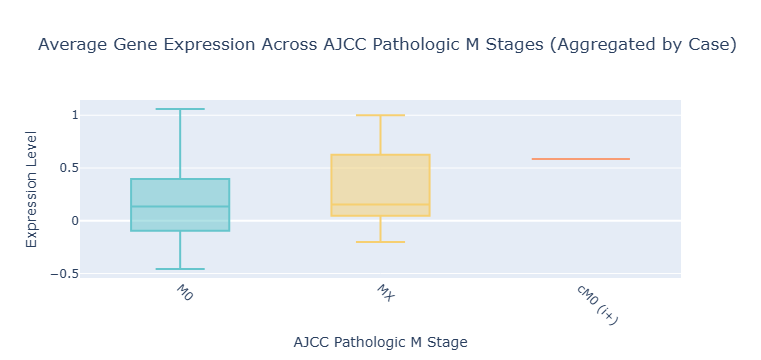

In [104]:
# Filter out "Unknown" values for AJCC Pathologic M stages
filtered_data_state_m = aggregated_data[
    (aggregated_data['ajcc_pathologic_m'] != "Unknown") & (aggregated_data['ajcc_pathologic_m']!= "nan")
]

fig = px.box(
    filtered_data_state_m,
    x='ajcc_pathologic_m',
    y='Expression',
    color='ajcc_pathologic_m', 
    title="Average Gene Expression Across AJCC Pathologic M Stages (Aggregated by Case)",
    labels={
        'ajcc_pathologic_m': 'AJCC Pathologic M Stage',
        'Expression': 'Expression Level'
    },
    color_discrete_sequence=px.colors.qualitative.Pastel 
)


fig.update_layout(
    xaxis_title="AJCC Pathologic M Stage",
    yaxis_title="Expression Level",
    xaxis_tickangle=45,
    showlegend=False  # Hide legend if not needed
)

# Show the interactive plot
fig.show()

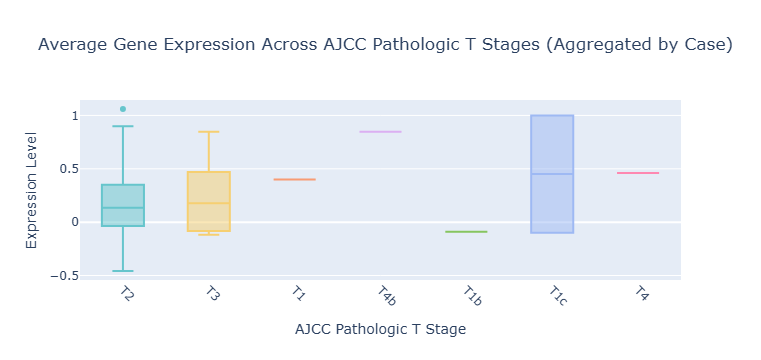

In [108]:
# Filter out "Unknown" values for AJCC Pathologic T stages
filtered_data_state_t = aggregated_data[
    (aggregated_data['ajcc_pathologic_t'] != "Unknown") & (aggregated_data['ajcc_pathologic_t']!= "nan")
]


fig = px.box(
    filtered_data_state_t,
    x='ajcc_pathologic_t',
    y='Expression',
    color='ajcc_pathologic_t',  
    title="Average Gene Expression Across AJCC Pathologic T Stages (Aggregated by Case)",
    labels={
        'ajcc_pathologic_t': 'AJCC Pathologic T Stage',
        'Expression': 'Expression Level'
    },
    color_discrete_sequence=px.colors.qualitative.Pastel 
)


fig.update_layout(
    xaxis_title="AJCC Pathologic T Stage",
    yaxis_title="Expression Level",
    xaxis_tickangle=45,
    showlegend=False 
)

fig.show()

C:\Users\sarah\AppData\Local\Temp\ipykernel_30188\1128557388.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



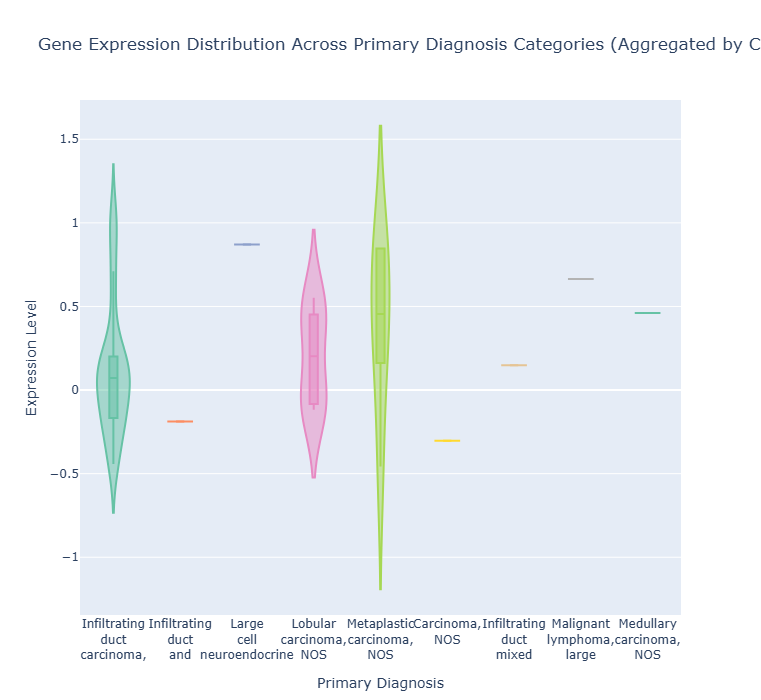

In [110]:
# Aggregate data by case (mean expression for cases with multiple rows)
aggregated_data = df_drop_Clean.groupby(['Case', 'primary_diagnosis'], as_index=False).agg({'Expression': 'mean'})

# Remove "Not Reported" values from the primary diagnosis column
filtered_data = aggregated_data[aggregated_data['primary_diagnosis'] != "Not Reported"]

# Shorten or format long labels with line breaks
filtered_data['primary_diagnosis'] = filtered_data['primary_diagnosis'].apply(
    lambda x: '<br>'.join(x.split(' ', 3)[:3]) if len(x.split(' ')) > 3 else x.replace(' ', '<br>')
)

# Create a violin plot using Plotly
fig = px.violin(
    filtered_data,
    x='primary_diagnosis',
    y='Expression',
    box=True,  
    points=False,
    color='primary_diagnosis',  
    title="Gene Expression Distribution Across Primary Diagnosis Categories (Aggregated by Case)",
    labels={
        'primary_diagnosis': 'Primary Diagnosis',
        'Expression': 'Expression Level'
    },
    color_discrete_sequence=px.colors.qualitative.Set2 
)


fig.update_layout(
    xaxis_title="Primary Diagnosis",
    yaxis_title="Expression Level",
    xaxis_tickangle=0,  
    showlegend=False,  
    width=1200, 
    height=700  
)


fig.show()

